<a href="https://colab.research.google.com/github/deshpandenu/Time-Series-Forecasting-of-Amazon-Stock-Prices-using-Neural-Networks-LSTM-and-GAN-/blob/master/AUTO_ARIMA_AND_FBPROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pmdarima

     |████████████████████████████████| 1.1MB 2.6MB/s 


In [2]:
!pip3 install chart-studio

     |████████████████████████████████| 81kB 2.6MB/s 


TAKE IN DATA AND WORK WITH IT

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
googlepath = "/content/drive/My Drive/dataAlpha/"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

data_frame_main = pd.read_csv(f'{googlepath}Close.csv')

In [7]:
data_frame_main.head()

#decide the date and target valueshere

df = data_frame_main
df.head()

,Unnamed: 0,Date,Close
0,5031,8/7/2019,1793.4000
1,5030,8/6/2019,1787.8300
2,5029,8/5/2019,1765.1300
3,5028,8/2/2019,1823.2400
4,5027,8/1/2019,1855.3199


In [0]:
df = df[['Date','Close']] #take in input from user for date and target 
data = df

Now convert this data to datatime format so we can find more seasonality 

In [9]:
data.head()

,Date,Close
0,8/7/2019,1793.4000
1,8/6/2019,1787.8300
2,8/5/2019,1765.1300
3,8/2/2019,1823.2400
4,8/1/2019,1855.3199


SEASONALITY OF THE DATA

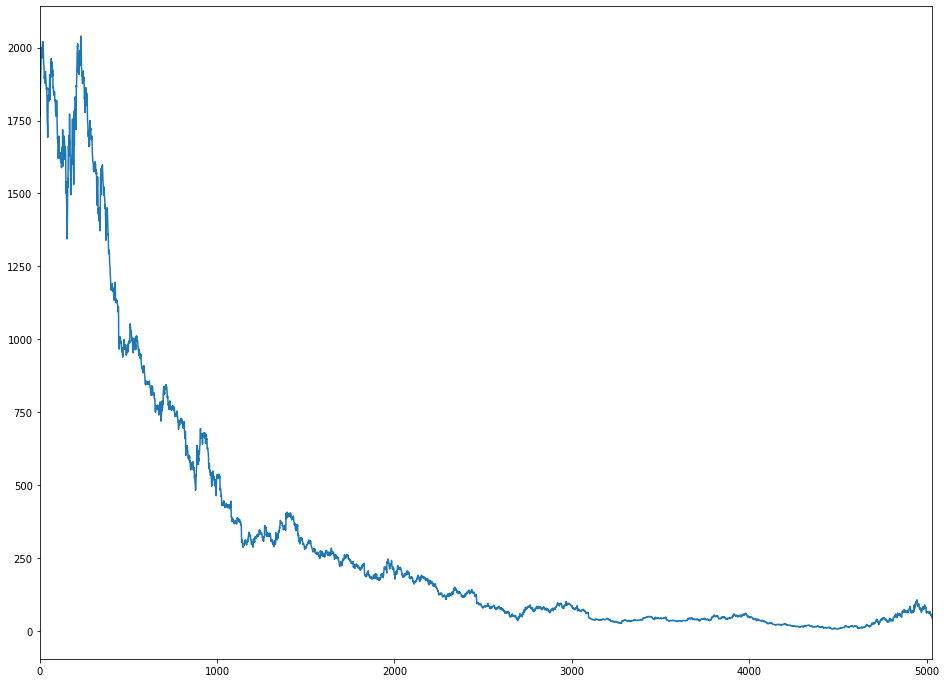

In [10]:
data['Close'].plot(figsize=(16, 12))

<Figure size 432x288 with 0 Axes>

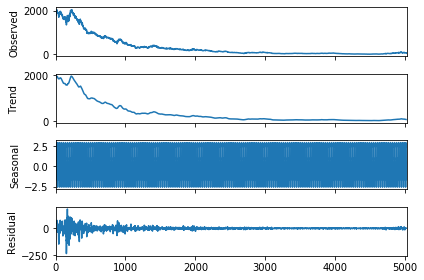

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='additive', freq=30)
fig = plt.figure()
fig = decomposition.plot()


In [12]:
decomposition.seasonal

0      -2.567657
1      -1.403710
2      -0.942764
3      -1.586548
4      -0.372740
          ...   
5027    2.818979
5028    2.436119
5029    2.779462
5030    2.707895
5031    2.973811
Name: Close, Length: 5032, dtype: float64

<Figure size 432x288 with 0 Axes>

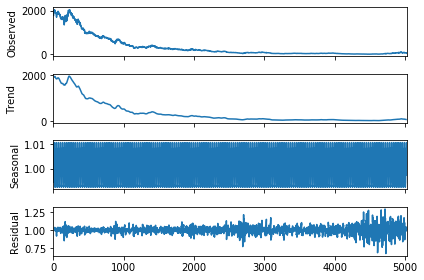

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='multiplicative', freq=30)
fig = plt.figure()
fig = decomposition.plot()


Can show these graphs to users which displays seasonality and trends.
Then find ARIMA and FBProphet

In [14]:
decomposition.trend

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5027   NaN
5028   NaN
5029   NaN
5030   NaN
5031   NaN
Name: Close, Length: 5032, dtype: float64

In [15]:
decomposition.seasonal

0       0.994448
1       0.996943
2       1.000264
3       0.997240
4       1.000196
          ...   
5027    1.008222
5028    1.002827
5029    0.998041
5030    0.997510
5031    0.997988
Name: Close, Length: 5032, dtype: float64

In [16]:
decomposition.resid

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5027   NaN
5028   NaN
5029   NaN
5030   NaN
5031   NaN
Name: Close, Length: 5032, dtype: float64

AUTO ARIMA

In [17]:
import pmdarima as pm
print(f"Using pmdarima {pm.__version__}")
# Using pmdarima 1.3.0

Using pmdarima 1.3.0


In [18]:
train_len = int(df.shape[0] * 0.8)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data['Close'].values
y_test = test_data['Close'].values

print(f"{train_len} train samples")
print(f"{df.shape[0] - train_len} test samples")

4025 train samples
1007 test samples


In [19]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 2


In [20]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Fit ARIMA: order=(2, 2, 2); AIC=31504.478, BIC=31542.277, Fit time=2.609 seconds
Fit ARIMA: order=(0, 2, 0); AIC=34328.192, BIC=34340.791, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=33254.310, BIC=33273.209, Fit time=0.044 seconds
Fit ARIMA: order=(0, 2, 1); AIC=31519.789, BIC=31538.688, Fit time=0.583 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=31520.980, BIC=31565.079, Fit time=2.090 seconds
Fit ARIMA: order=(2, 2, 1); AIC=31517.476, BIC=31548.975, Fit time=2.104 seconds
Fit ARIMA: order=(2, 2, 3); AIC=31507.325, BIC=31551.424, Fit time=3.542 seconds
Fit ARIMA: order=(1, 2, 1); AIC=31521.574, BIC=31546.773, Fit time=1.642 seconds
Fit ARIMA: order=(3, 2, 3); AIC=31519.946, BIC=31570.344, Fit time=8.053 seconds
Total fit time: 21.196 seconds


In [21]:
print(auto.order)  #always lowest AIC

(2, 2, 2)


In [0]:
train_1 = auto.fit(y_train)

In [23]:
train_1

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [0]:
model = auto
fc, conf_int = model.predict(n_periods=len(y_test), return_conf_int=True)

In [0]:
fc.tolist()[0]
forecasts = []
forecasts.append(fc)

In [0]:
#convert to dataframe 

forecasts = pd.DataFrame(forecasts,index=["Forecasts"])
forecasts = forecasts.T

In [0]:
#convert close values to dataframe

conf = pd.DataFrame(conf_int,columns = ["Lower margin of error","Higher margin of error"])


In [29]:
#take in original data

original_data = y_test
original_data = pd.DataFrame(original_data,columns=["Original Data"])
original_data.head()

,Original Data
0,38.93
1,39.15
2,39.01
3,38.94
4,38.67


In [0]:
#combine forecasts and up and down values

df_concat = pd.concat([forecasts,original_data,conf], axis=1)


Show the below table as the forecasted values to the user

In [31]:
df_concat.head(20)

,Forecasts,Original Data,Lower margin of error,Higher margin of error
0,40.336404,38.93,16.600618,64.072191
1,40.531898,39.15,7.000322,74.063473
2,41.001068,39.01,0.172216,81.829919
3,41.204863,38.94,-5.995837,88.405563
4,41.667653,38.67,-10.973053,94.308359
5,41.879161,39.65,-15.840019,99.598341
6,42.335954,40.03,-19.914613,104.586520
7,42.554807,41.64,-24.042244,109.151858
8,43.005960,40.66,-27.557937,113.569857
9,43.231809,41.39,-31.191954,117.655572


Make the plot for this ARIMA model!!

In [25]:
from sklearn.metrics import mean_squared_error

model = auto  # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
#print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 4.662917474937697


In [0]:
forecasts

In [0]:
confidence_intervals

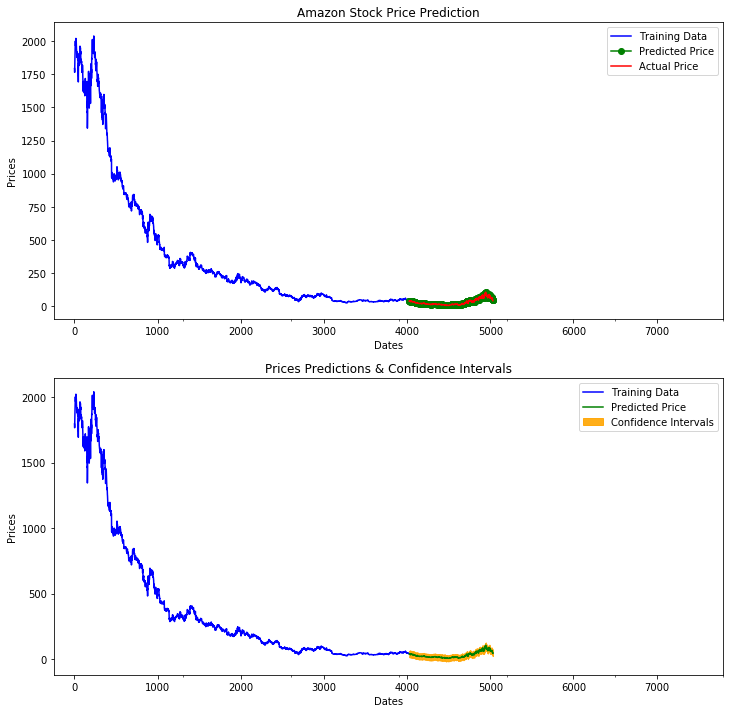

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
axes[0].plot(y_train, color='blue', label='Training Data')
axes[0].plot(test_data.index, forecasts, color='green', marker='o',
             label='Predicted Price')

axes[0].plot(test_data.index, y_test, color='red', label='Actual Price')
axes[0].set_title('Amazon Stock Price Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')

axes[0].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
axes[0].legend()


# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(y_train, color='blue', label='Training Data')
axes[1].plot(test_data.index, forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(test_data.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
axes[1].legend()


**FBPROPHET**

Use FBProphet graphs and forecasted values in comaprison with ARIMA. 
User can see forecasted table and graph

In [0]:
from fbprophet import Prophet


In [0]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


In [0]:
df.head()

,Unnamed: 0,Date,Low,High,Close,Open
0,5031,2019-08-07,1757.00,1798.9301,1793.4000,1773.9900
1,5030,2019-08-06,1753.40,1793.7700,1787.8300,1792.2300
2,5029,2019-08-05,1748.78,1788.6700,1765.1300,1770.2200
3,5028,2019-08-02,1808.02,1846.3600,1823.2400,1845.0699
4,5027,2019-08-01,1844.01,1897.9200,1855.3199,1871.7200


Prepare for Prophet

In [0]:
df = df[['Date','Close']]
df.head()

,Date,Close
0,2019-08-07,1793.4000
1,2019-08-06,1787.8300
2,2019-08-05,1765.1300
3,2019-08-02,1823.2400
4,2019-08-01,1855.3199


In [0]:
df=df.rename(columns={'Date':'ds', 'Close':'y'})

In [0]:
df.head()

,ds,y
0,2019-08-07,1793.4000
1,2019-08-06,1787.8300
2,2019-08-05,1765.1300
3,2019-08-02,1823.2400
4,2019-08-01,1855.3199


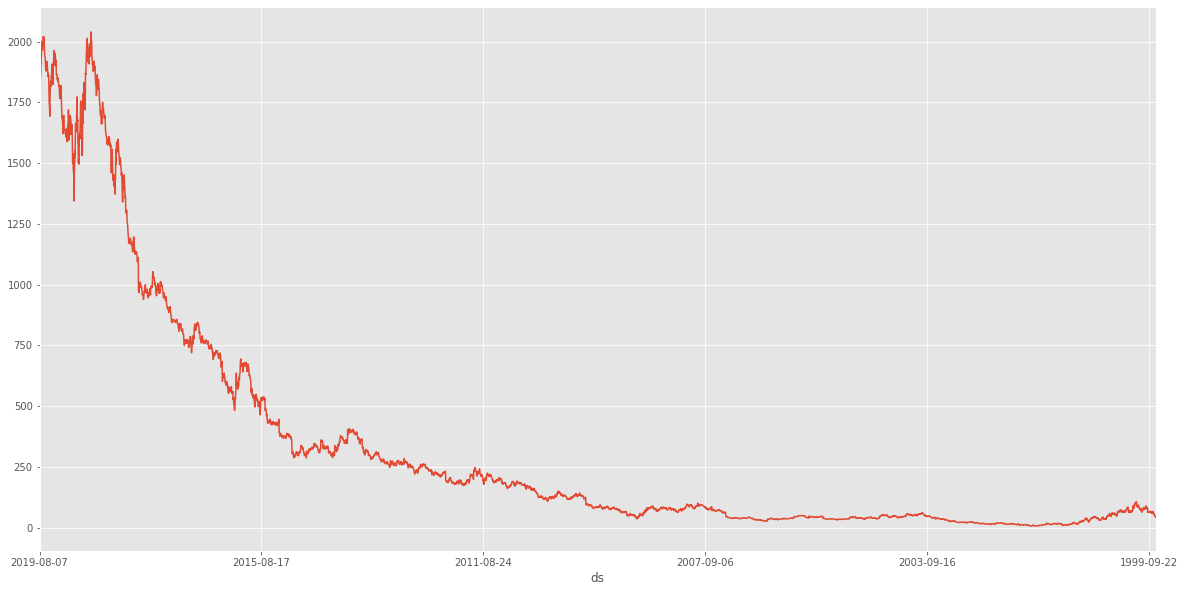

In [0]:
df.set_index('ds').y.plot()

In [0]:
model = Prophet(weekly_seasonality=True)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
5051,2021-03-31
5052,2021-04-30
5053,2021-05-31
5054,2021-06-30
5055,2021-07-31


In [0]:
forecast = model.predict(future)

In [0]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5051,2021-03-31,2569.523548,2463.070324,2664.462985,2534.309983,2611.264205,-2.843288,-2.843288,-2.843288,5.654579,5.654579,5.654579,-8.497866,-8.497866,-8.497866,0.0,0.0,0.0,2566.680261
5052,2021-04-30,2601.392443,2524.608694,2716.530288,2562.624820,2646.161605,11.204156,11.204156,11.204156,5.324097,5.324097,5.324097,5.880059,5.880059,5.880059,0.0,0.0,0.0,2612.596599
5053,2021-05-31,2634.323635,2544.997013,2745.881614,2592.677343,2683.262434,7.922704,7.922704,7.922704,5.619461,5.619461,5.619461,2.303243,2.303243,2.303243,0.0,0.0,0.0,2642.246339
5054,2021-06-30,2666.192530,2576.365317,2775.939025,2620.428856,2718.586013,10.903247,10.903247,10.903247,5.654579,5.654579,5.654579,5.248668,5.248668,5.248668,0.0,0.0,0.0,2677.095777
5055,2021-07-31,2699.123722,2592.730774,2808.143641,2648.829156,2755.588292,-2.992250,-2.992250,-2.992250,-14.592583,-14.592583,-14.592583,11.600332,11.600332,11.600332,0.0,0.0,0.0,2696.131472


In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5051,2021-03-31,2566.680261,2463.070324,2664.462985
5052,2021-04-30,2612.596599,2524.608694,2716.530288
5053,2021-05-31,2642.246339,2544.997013,2745.881614
5054,2021-06-30,2677.095777,2576.365317,2775.939025
5055,2021-07-31,2696.131472,2592.730774,2808.143641


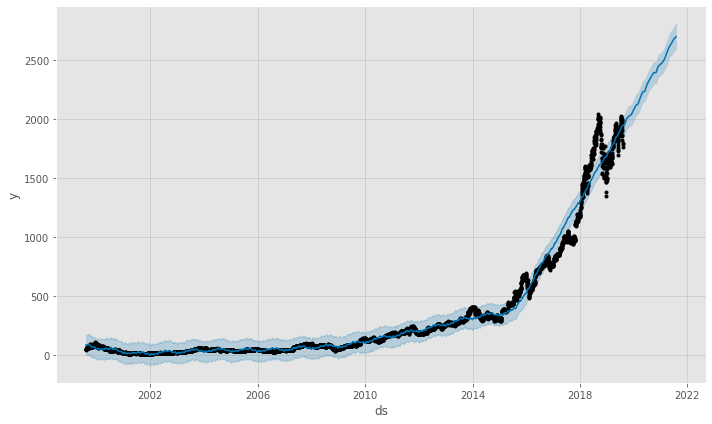

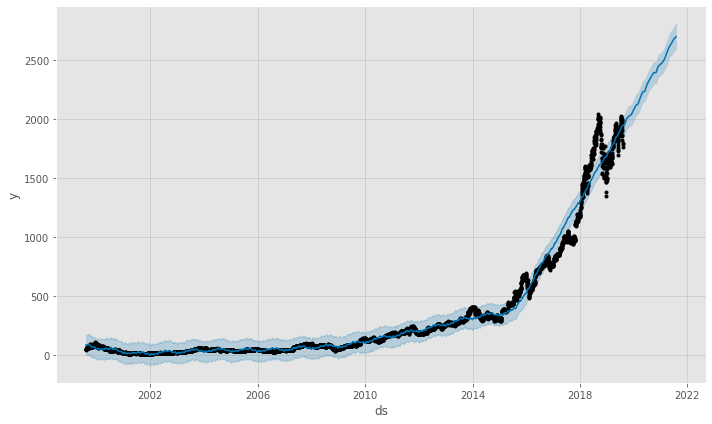

In [0]:
model.plot(forecast)

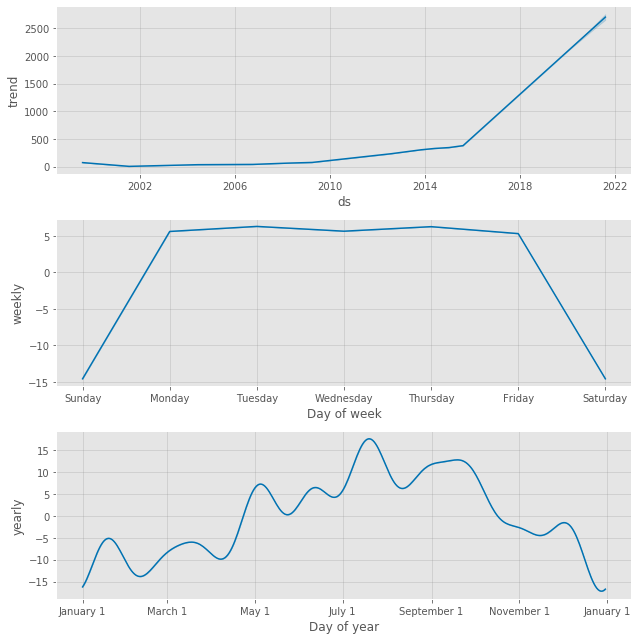

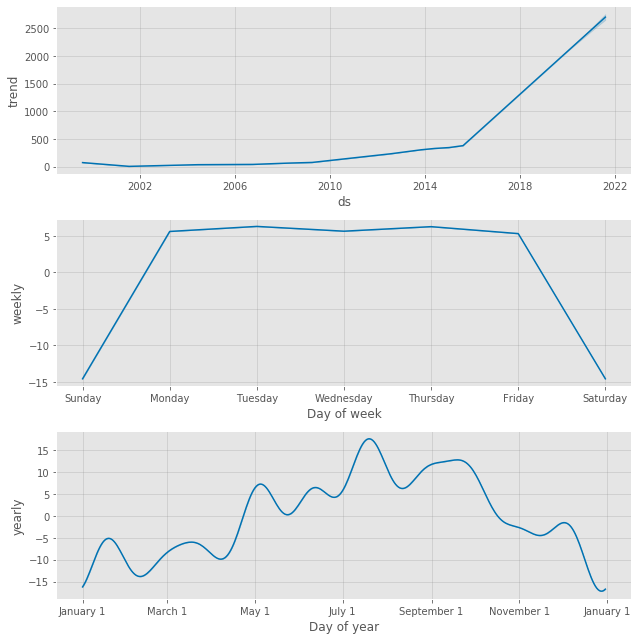

In [0]:
model.plot_components(forecast)

In [0]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 35 forecasts with cutoffs between 2001-11-04 00:00:00 and 2018-08-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2001-11-05,5.662133,-0.203405,11.946175,6.99,2001-11-04
1,2001-11-06,5.521064,-0.499886,12.187342,7.05,2001-11-04
2,2001-11-07,5.191697,-1.242767,11.691984,7.43,2001-11-04
3,2001-11-08,4.901184,-0.794125,10.891489,6.97,2001-11-04
4,2001-11-09,4.897653,-0.789441,11.124452,7.12,2001-11-04


In [0]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,16.160976,4.020072,2.596431,0.126034,0.351313
1,38 days,16.416590,4.051739,2.611019,0.126896,0.351940
2,39 days,16.662977,4.082031,2.625611,0.127437,0.354461
3,40 days,16.817706,4.100940,2.632420,0.127717,0.354946
4,41 days,16.785327,4.096990,2.624808,0.127670,0.356178


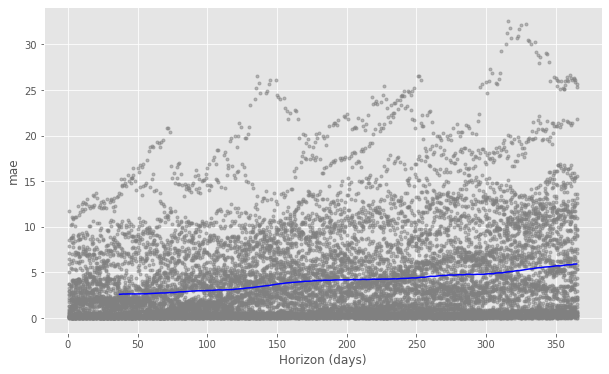

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')